In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Weather in Australia

In [ ]:
weatherAuDf = pd.read_csv('/content/drive/MyDrive/Orga Datos/TP1/Dataset Parte 2/weatherAUS.csv')

In [ ]:
RainfallByDate = weatherAuDf[['Date', "Rainfall"]]
RainfallByDate.dropna(inplace=True)
RainfallByDate['Year'] = pd.to_datetime(RainfallByDate['Date']).dt.year
RainfallByYear = RainfallByDate.groupby('Year', as_index=False).agg({"Rainfall": "mean"})
RainfallByYear

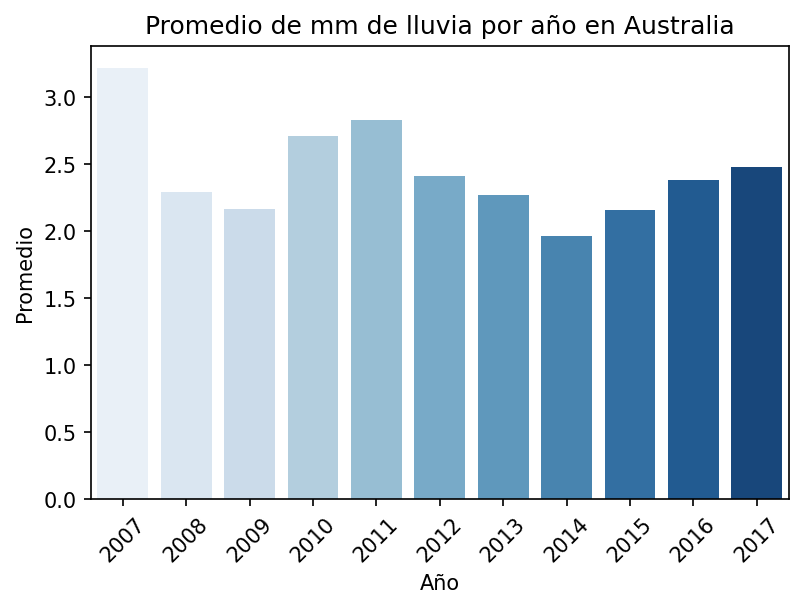

In [ ]:
plt.figure(dpi=150)
sns.barplot(data=RainfallByYear, x='Year', y='Rainfall', palette='Blues')
plt.title("Promedio de mm de lluvia por año en Australia")
plt.ylabel("Promedio")
plt.xlabel("Año")
plt.xticks(rotation=45)
plt.show()

In [ ]:
sydneyweatherDf = weatherAuDf.loc[weatherAuDf['Location'] == 'Sydney']
sydneyweatherDf = sydneyweatherDf[['Date', 'Rainfall']]
sydneyweatherDf.dropna(inplace=True)
sydneyweatherDf['Month'] = pd.to_datetime(sydneyweatherDf['Date']).dt.month
sydneyRainfallByYear = sydneyweatherDf.groupby('Month', as_index=False).agg({"Rainfall": "mean"})

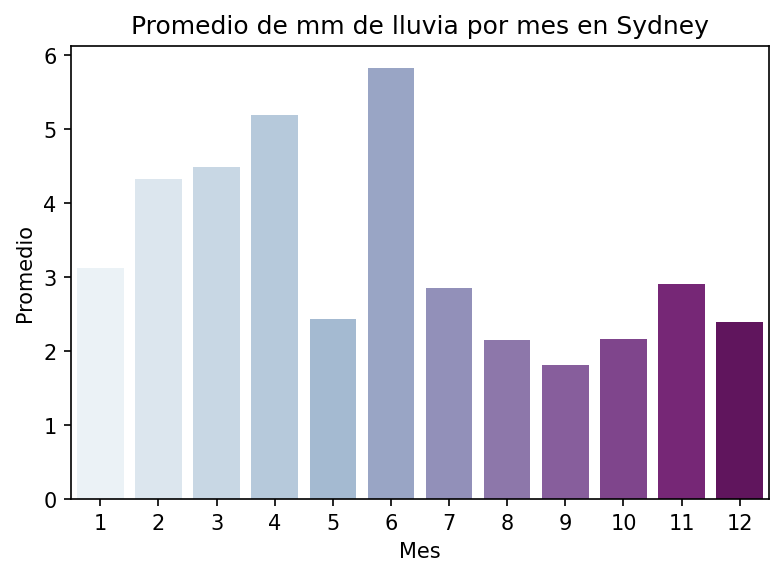

In [ ]:
plt.figure(dpi=150)
sns.barplot(data=sydneyRainfallByYear, x='Month', y='Rainfall', palette='BuPu')
plt.title("Promedio de mm de lluvia por mes en Sydney")
plt.ylabel("Promedio")
plt.xlabel("Mes")
plt.show()

# House Pricing

In [ ]:
housePricingDf = pd.read_csv('/content/drive/MyDrive/Orga Datos/TP1/Dataset Parte 2/house_pricing_train.csv')

In [ ]:
msZoningBySalePrice = housePricingDf[['MSZoning', 'SalePrice']]
msZoningBySalePrice.dropna(inplace=True)

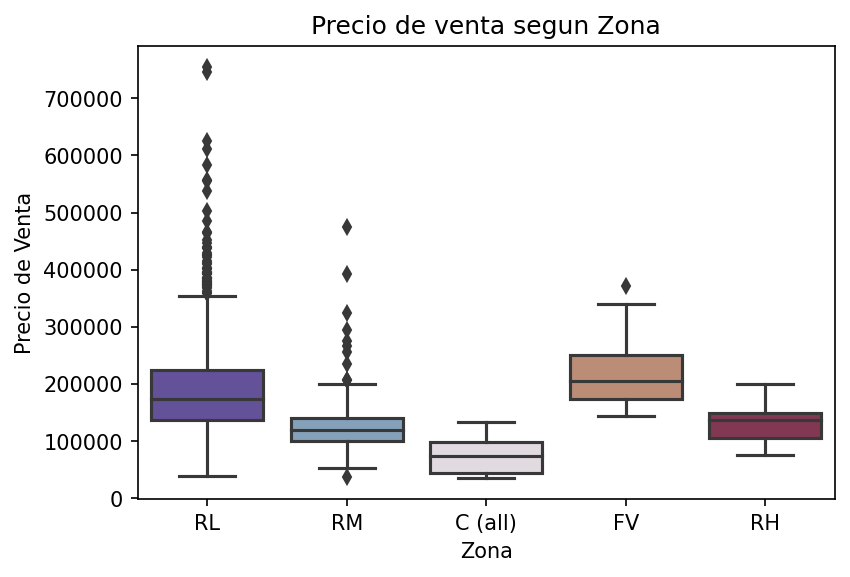

In [ ]:
plt.figure(dpi=150)
sns.boxplot(data=msZoningBySalePrice, x='MSZoning', y='SalePrice', palette='twilight_shifted')
plt.title("Precio de venta segun Zona")
plt.ylabel("Precio de Venta")
plt.xlabel("Zona")
plt.show()

In [ ]:
salePriceByNumOfCars = housePricingDf[['GarageCars', 'SalePrice']]

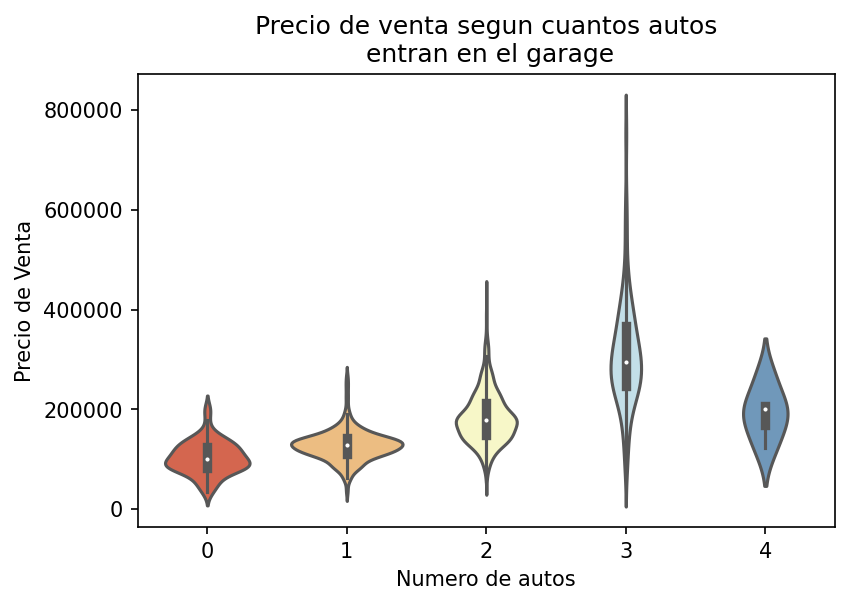

In [ ]:
plt.figure(dpi=150)
sns.violinplot(data=salePriceByNumOfCars, x='GarageCars', y='SalePrice', palette='RdYlBu')
plt.title("Precio de venta segun cuantos autos\n entran en el garage")
plt.ylabel("Precio de Venta")
plt.xlabel("Numero de autos")
plt.show()

# Flight Delay

In [2]:
flightDelaysDf = pd.read_csv('/content/drive/MyDrive/Orga Datos/TP1/Dataset Parte 2/flight_delays_train.csv')

In [3]:
flightDelaysDf['Delay'] = flightDelaysDf['dep_delayed_15min'].map(lambda x: 1 if x == "Y" else 0)
flightDalaysCorr = flightDelaysDf[['DepTime', 'Distance', 'Delay']].corr()

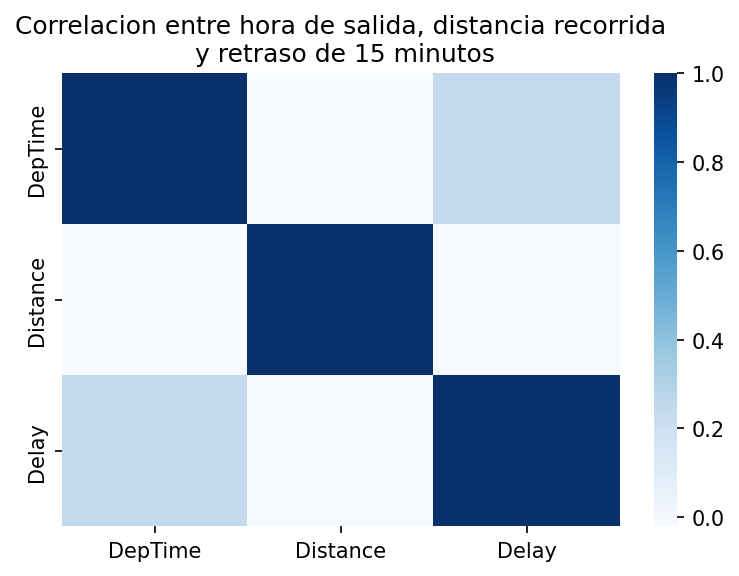

In [4]:
plt.figure(dpi=150)
sns.heatmap(flightDalaysCorr, cmap='Blues')
plt.title("Correlacion entre hora de salida, distancia recorrida\n y retraso de 15 minutos")
plt.show()

In [13]:
flightDelaysOriginAirport = flightDelaysDf[['Origin', 'Delay']]

In [ ]:
flightDelaysOriginAirport = flightDelaysOriginAirport.groupby("Origin", as_index=False).agg({"Delay": "sum"})
flightDelaysOriginAirport

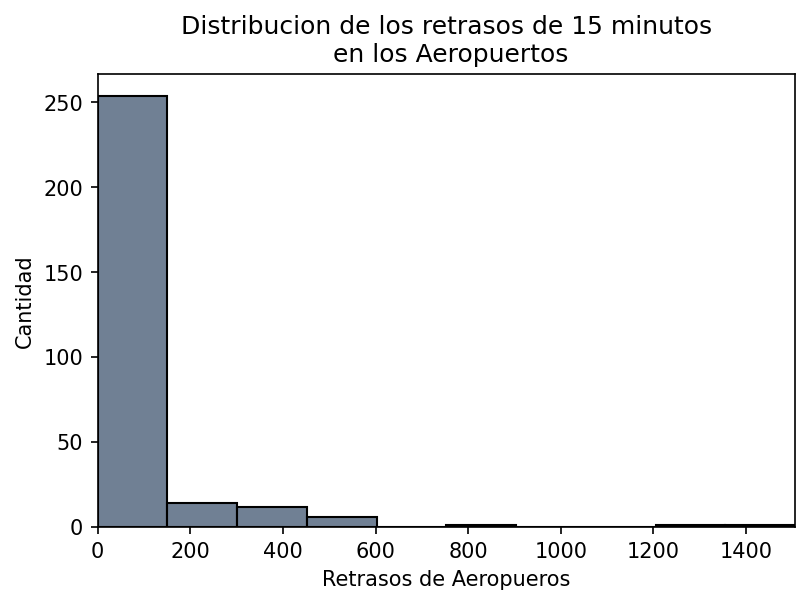

In [18]:
plt.figure(dpi=150)
sns.histplot(flightDelaysOriginAirport['Delay'],  bins=10, color=(64/255, 85/255, 112/255))
plt.title("Distribucion de los retrasos de 15 minutos\n en los Aeropuertos")
plt.ylabel("Cantidad")
plt.xlabel("Retrasos en Aeropueros")
plt.xlim((flightDelaysOriginAirport['Delay'].min(), flightDelaysOriginAirport['Delay'].max()))
plt.show()